# Artificial Intelligence in Finance

## Recurrent Neural Networks

MEU PROJETO COM WINN

## First Example

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

In [2]:
import random
import numpy as np
import pandas as pd
import tensorflow as tf
from pprint import pprint
from pylab import plt, mpl
plt.style.use('seaborn')
mpl.rcParams['savefig.dpi'] = 300
mpl.rcParams['font.family'] = 'serif'
#pd.set_option('precision', 4)
np.set_printoptions(suppress=True, precision=4)
os.environ['PYTHONHASHSEED'] = '0'

C:\Users\adria\AppData\Local\Temp\ipykernel_6864\1632325378.py:7: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [3]:
from sklearn.metrics import accuracy_score
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import SimpleRNN, LSTM, Dense
from keras.layers import Dropout

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
def set_seeds(seed=100):
    random.seed(seed)
    np.random.seed(seed)
    tf.random.set_seed(seed)
set_seeds()

In [6]:
### Meus dados

path = r'C:\Users\adria\1Python\Meu_novo_projeto\WIN_N_1K\WIN_N_1k.csv'
symbol = 'WIN_N'
raw = pd.read_csv(path, index_col=0, parse_dates=True)
raw

,open,high,low,close,tick_volume,real_volume
time,,,,,,
2022-01-18 11:38:00,106635.0,106725.0,106610.0,106705.0,17263,64315
2022-01-18 11:39:00,106710.0,106825.0,106665.0,106785.0,25017,90996
2022-01-18 11:40:00,106780.0,106860.0,106675.0,106685.0,30803,110379
2022-01-18 11:41:00,106690.0,106910.0,106665.0,106885.0,30323,112419
2022-01-18 11:42:00,106880.0,106965.0,106800.0,106955.0,22614,80706
...,...,...,...,...,...,...
2022-10-13 16:55:00,114915.0,114920.0,114915.0,114915.0,38,275
2022-10-13 16:56:00,114920.0,114920.0,114915.0,114920.0,56,240
2022-10-13 16:57:00,114920.0,114920.0,114915.0,114920.0,42,200


In [7]:
### FUNÇÃO PARA EXTRAIR FECHAMENTO E COLOCAR EM UM DATAFRAME CHAMADO DATA
def generate_data():
    data = pd.DataFrame(raw['close'])
    data.columns = [symbol]
    return data

In [8]:
## CRIA O DATA CONFORME A FUNÇÃO | DATA SERÁ UM DATAFRAME CLOSE
data = generate_data()
data

,WIN_N
time,
2022-01-18 11:38:00,106705.0
2022-01-18 11:39:00,106785.0
2022-01-18 11:40:00,106685.0
2022-01-18 11:41:00,106885.0
2022-01-18 11:42:00,106955.0
...,...
2022-10-13 16:55:00,114915.0
2022-10-13 16:56:00,114920.0
2022-10-13 16:57:00,114920.0


In [9]:
## CRIA UMA COLUNA R COM OS RETORNOS
data['r'] = np.log(data / data.shift(1))
data

,WIN_N,r
time,,
2022-01-18 11:38:00,106705.0,NaN
2022-01-18 11:39:00,106785.0,0.000749
2022-01-18 11:40:00,106685.0,-0.000937
2022-01-18 11:41:00,106885.0,0.001873
2022-01-18 11:42:00,106955.0,0.000655
...,...,...
2022-10-13 16:55:00,114915.0,-0.000044
2022-10-13 16:56:00,114920.0,0.000044
2022-10-13 16:57:00,114920.0,0.000000


In [10]:
## REMOVE OS NA
data.dropna(inplace=True)

In [11]:
## NORMALIZAÇÃO DOS DADOS  
## = >> REPARE QUE A NORMALIZAÇÂO ESTA SENDO FEITA ANTES DE DIVIDIR O TREINO
data = (data - data.mean()) / data.std()
data

,WIN_N,r
time,,
2022-01-18 11:39:00,-0.620366,1.269051
2022-01-18 11:40:00,-0.637436,-1.589288
2022-01-18 11:41:00,-0.603296,3.173323
2022-01-18 11:42:00,-0.591347,1.108444
2022-01-18 11:43:00,-0.560620,2.848925
...,...,...
2022-10-13 16:55:00,0.767445,-0.075004
2022-10-13 16:56:00,0.768299,0.072492
2022-10-13 16:57:00,0.768299,-0.001256


In [12]:
### DIVIDIR OS DADOS ENTRE TREINAMENTO E TESTE
split = int(len(data) * 0.8)
train = data.iloc[:split].copy()
test = data.iloc[split:].copy()

In [13]:
train

,WIN_N,r
time,,
2022-01-18 11:39:00,-0.620366,1.269051
2022-01-18 11:40:00,-0.637436,-1.589288
2022-01-18 11:41:00,-0.603296,3.173323
2022-01-18 11:42:00,-0.591347,1.108444
2022-01-18 11:43:00,-0.560620,2.848925
...,...,...
2022-08-19 11:53:00,0.525048,-0.075926
2022-08-19 11:54:00,0.516513,-0.748143
2022-08-19 11:55:00,0.541264,2.163812


In [14]:
test

,WIN_N,r
time,,
2022-08-19 11:58:00,0.540411,-0.821801
2022-08-19 11:59:00,0.548093,0.670129
2022-08-19 12:00:00,0.553214,0.446187
2022-08-19 12:01:00,0.546386,-0.597872
2022-08-19 12:02:00,0.550653,0.371654
...,...,...
2022-10-13 16:55:00,0.767445,-0.075004
2022-10-13 16:56:00,0.768299,0.072492
2022-10-13 16:57:00,0.768299,-0.001256


In [15]:
## CRIA UM ARRAY COM OS VALORES DE FECHAMENTO
#p = data[symbol].values ## Valores brutos
train = data[['r','WIN_N']].values ## Valores dos retornos
train

array([[ 1.2691, -0.6204],
       [-1.5893, -0.6374],
       [ 3.1733, -0.6033],
       ...,
       [-0.0013,  0.7683],
       [-0.075 ,  0.7674],
       [-0.075 ,  0.7666]])

In [16]:
## TRASNFORMA P QUE É 'UMA LINHA COM VARIAS COLUNAS' EM 'UMA COLUNA COM VARIAS LINHAS'
train = train.reshape((len(train), -1))
train

array([[ 1.2691, -0.6204],
       [-1.5893, -0.6374],
       [ 3.1733, -0.6033],
       ...,
       [-0.0013,  0.7683],
       [-0.075 ,  0.7674],
       [-0.075 ,  0.7666]])

In [17]:
lags = 5

In [18]:
### TRANSFORMA O P EM UMA SERIE TEMPORAL TENSORFLOW PARA SER TREINADA
g = TimeseriesGenerator(train, train, length=lags, batch_size=5)

In [19]:
pprint(list(g)[0])

(array([[[ 1.2691, -0.6204],
        [-1.5893, -0.6374],
        [ 3.1733, -0.6033],
        [ 1.1084, -0.5913],
        [ 2.8489, -0.5606]],

       [[-1.5893, -0.6374],
        [ 3.1733, -0.6033],
        [ 1.1084, -0.5913],
        [ 2.8489, -0.5606],
        [ 0.0778, -0.5598]],

       [[ 3.1733, -0.6033],
        [ 1.1084, -0.5913],
        [ 2.8489, -0.5606],
        [ 0.0778, -0.5598],
        [-1.5049, -0.576 ]],

       [[ 1.1084, -0.5913],
        [ 2.8489, -0.5606],
        [ 0.0778, -0.5598],
        [-1.5049, -0.576 ],
        [-1.4269, -0.5913]],

       [[ 2.8489, -0.5606],
        [ 0.0778, -0.5598],
        [-1.5049, -0.576 ],
        [-1.4269, -0.5913],
        [ 0.2364, -0.5888]]]),
 array([[ 0.0778, -0.5598],
       [-1.5049, -0.576 ],
       [-1.4269, -0.5913],
       [ 0.2364, -0.5888],
       [-2.0624, -0.611 ]]))


In [22]:
### FUNÇÃO PARA CRIAR MODELOS
### DEPOIS ALTERAR PARA MODELO FIXO E NÃO A PARTIR DE FUNÇÃO
def create_deep_rnn_model(hl=2, hu=100, layer='SimpleRNN',
                          optimizer='rmsprop', features=2,
                          dropout=False, rate=0.3, seed=100):
    if hl <= 2: hl = 2
    if layer == 'SimpleRNN':
        layer = SimpleRNN
    else:
        layer = LSTM
    model = Sequential()
    model.add(layer(hu, input_shape=(lags, features),
                     return_sequences=True,
                    ))
    if dropout:
        model.add(Dropout(rate, seed=seed))
    for _ in range(2, hl):
        model.add(layer(hu, return_sequences=True))
        if dropout:
            model.add(Dropout(rate, seed=seed))
    model.add(layer(hu))
    model.add(Dense(1, activation=None))
    model.compile(optimizer='adam',loss='mse',metrics=['mae'])
    return model

In [20]:
### FUNÇÃO PARA CRIAR MODELOS
### DEPOIS ALTERAR PARA MODELO FIXO E NÃO A PARTIR DE FUNÇÃO
hu=100
features=2,
rate=0.3
seed=100
layer = LSTM

model = Sequential()
model.add(layer(hu, input_shape=(lags, features),return_sequences=True))
model.add(layer(hu, return_sequences=True))
model.add(Dropout(rate, seed=seed))
model.add(layer(hu))
model.add(Dense(1, activation=None))
model.compile(optimizer='adam',loss='mse')

TypeError: Dimension value must be integer or None or have an __index__ method, got value '(2,)' with type '<class 'tuple'>'

In [ ]:
#model = Sequential()
#model.add(SimpleRNN(500, activation='relu', input_shape=(lags, 1)))
#model.add(Dense(1, activation='linear'))
#model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])

In [23]:
## CRIA O MODELO A APARTIR DA FUNÇÃO
set_seeds()
model = create_deep_rnn_model(
            hl=2, hu=50, layer='LSTM',
            features=len(data.columns),
            dropout=True, rate=0.3)

In [24]:
### VIZUALIZA O MODELO QUE SERÁ USADO PARA TREINAR A SERIE G
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 5, 50)             10600     
_________________________________________________________________
dropout (Dropout)            (None, 5, 50)             0         
_________________________________________________________________
lstm_2 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,851
Trainable params: 30,851
Non-trainable params: 0
_________________________________________________________________


In [25]:
%%time
### TREINA DA SERIE G A PARTIR DO MODELO
model.fit(g, epochs=500, steps_per_epoch=10, verbose=False)

CPU times: total: 1min 32s
Wall time: 1min 27s


In [26]:
### INFORMAÇÔES DO TREINO
res = pd.DataFrame(model.history.history)
res.tail(3)

,loss,mae
497,0.757763,0.754615
498,0.600839,0.611952
499,0.603153,0.617106


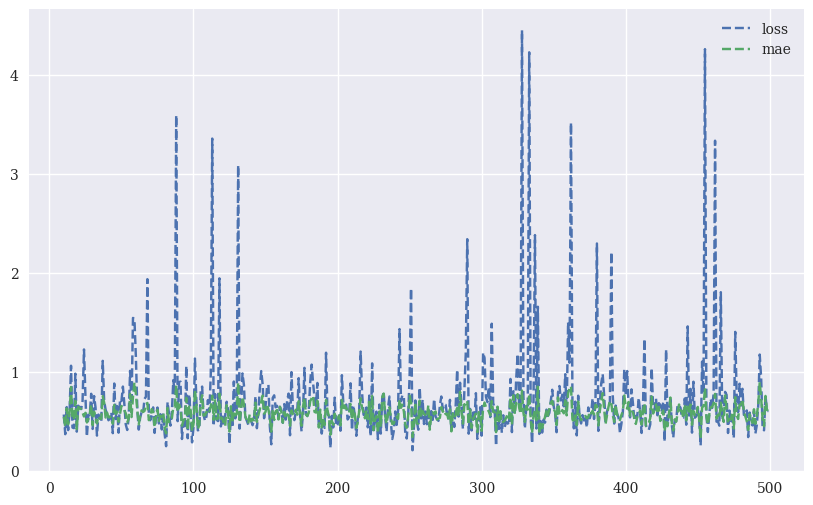

In [27]:
res.iloc[10:].plot(figsize=(10, 6), style=['--', '--']);

In [28]:
### CRIA UMA SERIE COM OS VALORES PARA SER TESTADO
g_ = TimeseriesGenerator(test.values, test['r'].values,
                         length=lags, batch_size=5)

In [29]:
%%time
### ACHATA AS PREVISÕES PARA UM ARRAY
y = model.predict(g_).flatten()

CPU times: total: 18.7 s
Wall time: 15.5 s


In [30]:
len(y)

19995

In [31]:
test['pred'] = np.nan
test['pred'].iloc[lags:] = y

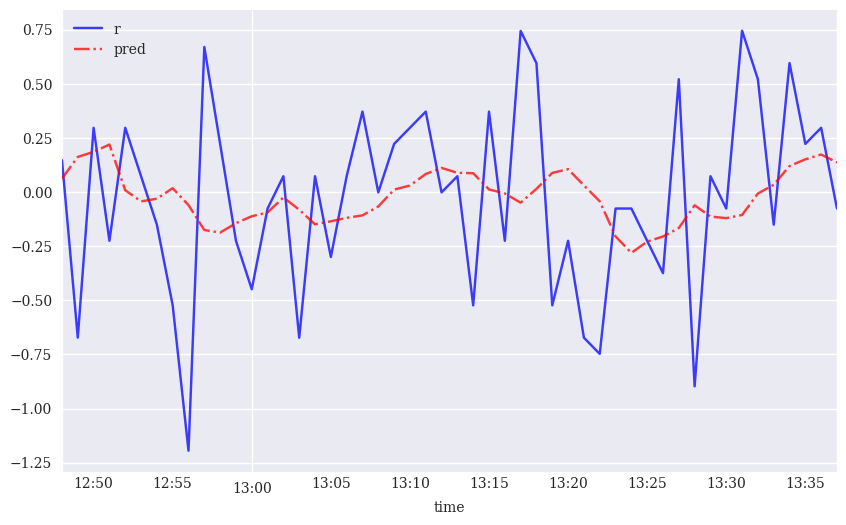

In [32]:
test[['r', 'pred']].iloc[50:100].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

In [ ]:
test[['r', 'pred']].plot(
            figsize=(10, 6), style=['b', 'r-.'],
            alpha=0.75);

In [ ]:
### MEDE A ACURACIA DO MODELO
## REMOVE OS NA
test.dropna(inplace=True)
accuracy_score(np.sign(test['r']), np.sign(test['pred']))

In [ ]:
data

In [ ]:
train

In [ ]:
test